In [10]:
import pandas as pd
import numpy as np
ft_zodiac=pd.read_csv('ft_zodiac.txt')
ft_zodiac.head()

,0,order_id,chinese_zodiac,zodiac
0,0,100000081567592448,狗,处女座
1,0,100000467565182976,牛,双子座
2,0,100000530945323008,羊,射手座
3,0,100000556765458432,鼠,摩羯座
4,0,100000598171623424,虎,水瓶座


In [11]:
zodiac_label = pd.read_csv('zodiac_label.txt')

In [12]:
ft_label = zodiac_label[zodiac_label.label != 2]
ft_label.head(),ft_label.shape

(             order_id  overdue_days  repay_time  label
 0  100000081567592448             0  2018-07-09      0
 1  100000467565182976             1  2018-07-09      0
 2  100000530945323008             0  2018-07-09      0
 3  100000556765458432             0  2018-07-09      0
 4  100000598171623424             0  2018-07-09      0, (42892, 4))

In [13]:
data = pd.merge(ft_label,ft_zodiac,on = 'order_id',how = 'inner')
data.head()

,order_id,overdue_days,repay_time,label,0,chinese_zodiac,zodiac
0,100000081567592448,0,2018-07-09,0,0,狗,处女座
1,100000467565182976,1,2018-07-09,0,0,牛,双子座
2,100000530945323008,0,2018-07-09,0,0,羊,射手座
3,100000556765458432,0,2018-07-09,0,0,鼠,摩羯座
4,100000598171623424,0,2018-07-09,0,0,虎,水瓶座


In [32]:
#存储星座
zodiac_list=set(data['zodiac'])
chinese_zodiac_list = set(data.chinese_zodiac)
zodiac_list

{'双子座',
 '双鱼座',
 '处女座',
 '天秤座',
 '天蝎座',
 '射手座',
 '巨蟹座',
 '摩羯座',
 '水瓶座',
 '狮子座',
 '白羊座',
 '金牛座'}

In [15]:
chinese_zodiac_list

{'兔', '牛', '狗', '猪', '猴', '羊', '虎', '蛇', '马', '鸡', '鼠', '龙'}

In [48]:
#不同星座坏账率统计
zodiac_badrate={}
for i in zodiac_list:
    total = data[data.zodiac == i]
    bad = total[total.label ==1 ]['label'].count()
    goog = total[total.label ==0 ]['label'].count()
    zodiac_badrate[i]=round(bad/(bad+good),3)
zodiac_badrate

{'巨蟹座': 0.16,
 '天蝎座': 0.154,
 '双子座': 0.15,
 '白羊座': 0.139,
 '水瓶座': 0.154,
 '金牛座': 0.132,
 '射手座': 0.162,
 '摩羯座': 0.139,
 '处女座': 0.163,
 '双鱼座': 0.165,
 '狮子座': 0.158,
 '天秤座': 0.161}

In [49]:
f = zip(zodiac_badrate.keys(),zodiac_badrate.values())
f = sorted(f,key = lambda x : x[1],reverse = True )
zodiac_badrate = pd.DataFrame(f)
zodiac_badrate.columns = pd.Series(['星座','badrate'])
zodiac_badrate = zodiac_badrate.sort_values('badrate',ascending = False)

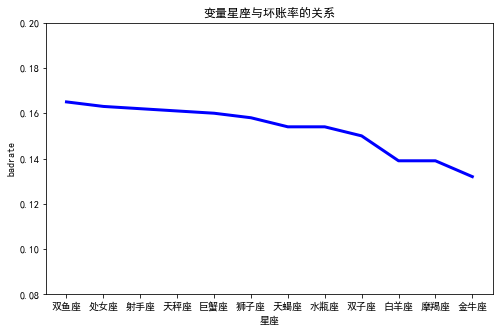

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['figure.figsize'] = (8, 5)
x=zodiac_badrate['星座']
y=zodiac_badrate['badrate']
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set(title='变量星座与坏账率的关系',ylabel='badrate',xlabel='星座')
ax.set_ylim(0.08,0.20,0.05)
ax.plot(x, y, color='blue', linewidth=3)
plt.show()



In [60]:
from pyecharts.charts import *
from pyecharts import options as opts
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
np.set_printoptions(suppress=True)
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
line = (
    Line()
    .add_xaxis(list(zodiac_badrate['星座']))
    .add_yaxis(
        "分组坏人占比",
        list(zodiac_badrate['badrate']),
        yaxis_index=0,
        color="red",
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="变量星座与坏账率的关系"),
    )
)
line.render_notebook()

In [54]:
#生肖
chinese_zodiac_badrate = {}
for x in chinese_zodiac_list:
    aa=data[data.chinese_zodiac==x]
    
    bad=aa[aa.label==1]['label'].count()
    good=aa[aa.label==0]['label'].count()
    
    chinese_zodiac_badrate[x] = round(bad/(bad+good),3)
f = zip(chinese_zodiac_badrate.keys(),chinese_zodiac_badrate.values())
f = sorted(f,key = lambda x : x[1],reverse = True )
chinese_zodiac_badrate = pd.DataFrame(f)
chinese_zodiac_badrate.columns = pd.Series(['生肖','badrate'])
chinese_zodiac_badrate

,生肖,badrate
0,牛,0.158
1,虎,0.152
2,兔,0.150
3,龙,0.144
4,猪,0.143
5,鼠,0.134
6,蛇,0.128
7,鸡,0.128
8,马,0.121
9,猴,0.120


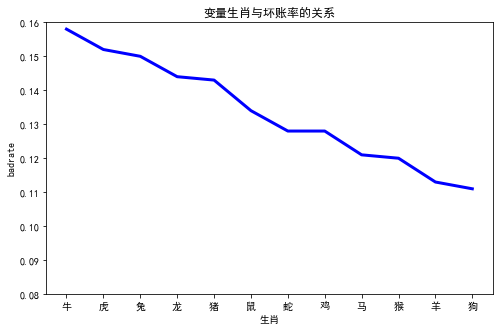

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['figure.figsize'] = (8, 5)
x = chinese_zodiac_badrate['生肖']
y = chinese_zodiac_badrate['badrate']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title='变量生肖与坏账率的关系',ylabel='badrate',xlabel='生肖')
ax.set_ylim(0.08,0.16,0.05)
ax.plot(x, y, color='blue', linewidth=3)
plt.show()

In [57]:
from pyecharts.charts import *
from pyecharts import options as opts
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
np.set_printoptions(suppress=True)
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
line = (
    Line()
    .add_xaxis(list(chinese_zodiac_badrate['生肖']))
    .add_yaxis(
        "分组坏人占比",
        list(chinese_zodiac_badrate['badrate']),
        yaxis_index=0,
        color="red",
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="变量生肖与坏账率的关系"),
    )
)
line.render_notebook()